In [1]:
import pandas as pd 
import sklearn
import numpy as np
import string
import nltk
import re

# Tambien se puede importar modulos
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

# Downloading NLP corpus from NLTK 
nltk.download('stopwords')
nltk.download('wordnet')

# Tokenización
from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn import tree
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import chi2

from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest

from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz confusión
from sklearn import metrics
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chango/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/chango/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/Users/chango/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_sentiment = pd.read_csv('df_sentiment.csv', index_col='Unnamed: 0', encoding="latin1")
df_label = pd.read_csv('df_label.csv', index_col='Unnamed: 0', encoding="latin1")
df_category = pd.read_csv('df_category.csv', index_col='Unnamed: 0', encoding="latin1")

## Clasificador de clases múltiples: características y diseño

* Para entrenar clasificadores supervisados, primero se transformará los mensages en un vector de números. Luego se explorará las representaciones de vectores como vectores ponderados TF-IDF.

* Después de tener estas representaciones vectoriales del texto, se podrá entrenar clasificadores supervisados para entrenar mensages no vistos y predecir la categoría en el que deberían ir.


Después de toda la transformación de datos anterior, ahora que tenemos todas las características y etiquetas, es hora de entrenar a los clasificadores. Hay una serie de algoritmos que podemos usar para este tipo de problema.

**Clasificador Naive Bayes** : el más adecuado para el recuento de palabras es la variante multinomial:

In [3]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(df_sentiment['message'], df_sentiment['sentimiento'], test_size=0.33, random_state = 0)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(df_label['message'], df_label['label'], test_size=0.33, random_state = 0)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(df_category['message'], df_category['categoria'], test_size=0.33, random_state = 0)

count_vect = CountVectorizer()

X_train_counts_s = count_vect.fit_transform(X_train_s)
X_train_counts_l = count_vect.fit_transform(X_train_l)
X_train_counts_c = count_vect.fit_transform(X_train_c)

tfidf_transformer = TfidfTransformer()

X_train_s_tfidf = tfidf_transformer.fit_transform(X_train_counts_s)
X_train_l_tfidf = tfidf_transformer.fit_transform(X_train_counts_l)
X_train_c_tfidf = tfidf_transformer.fit_transform(X_train_counts_c)

clf_s = MultinomialNB().fit(X_train_s_tfidf, y_train_s)
clf_l = MultinomialNB().fit(X_train_l_tfidf, y_train_l)
clf_c = MultinomialNB().fit(X_train_c_tfidf, y_train_c)

Después de ajustar el conjunto de entrenamiento, hagamos algunas predicciones.

In [4]:
print(clf_s.predict(count_vect.transform(["comuna necesito que poden el arbol de navarro   pero no desramaje poda   las ramas se meten a la ventana superior de mi casa  vienen palomas y dejan insectos   por favortambien que me hagan la vereda ya que estan trabajando en la calle navarro   mi direccion es navarro y he pedido construccion de pozos sumideros   tambien en esta calle y en esta direccionespero respuesta ya que los reclamos estan hechos por el saludoshayde parra navarro"])))

['negativo']


In [5]:
print(clf_l.predict(count_vect.transform(["comuna necesito que poden el arbol de navarro   pero no desramaje poda   las ramas se meten a la ventana superior de mi casa  vienen palomas y dejan insectos   por favortambien que me hagan la vereda ya que estan trabajando en la calle navarro   mi direccion es navarro y he pedido construccion de pozos sumideros   tambien en esta calle y en esta direccionespero respuesta ya que los reclamos estan hechos por el saludoshayde parra navarro"])))

['reclamo']


In [6]:
print(clf_c.predict(count_vect.transform(["comuna necesito que poden el arbol de navarro   pero no desramaje poda   las ramas se meten a la ventana superior de mi casa  vienen palomas y dejan insectos   por favortambien que me hagan la vereda ya que estan trabajando en la calle navarro   mi direccion es navarro y he pedido construccion de pozos sumideros   tambien en esta calle y en esta direccionespero respuesta ya que los reclamos estan hechos por el saludoshayde parra navarro"])))

['abl']


In [7]:
print(clf_s.predict(count_vect.transform(["lo felicito por el excelente trabajo en la plaza de la comuna 10"])),
     clf_l.predict(count_vect.transform(["lo felicito por el excelente trabajo en la plaza de la comuna 10"])),
     clf_c.predict(count_vect.transform(["lo felicito por el excelente trabajo en la plaza de la comuna 10"])))

['negativo'] ['reclamo'] ['abl']


Tal como puede observarse no clasifica muy bien, quizas influya la gran desigualdad en las clases.

## Selección de modelo

Ahora se experimentará con diferentes modelos de aprendizaje automático, para evaluar su precisión y encontrar la fuente de posibles problemas.

Se analizará los siguientes cuatro modelos:

* Regresión logística
* (Multinomial) Naive Bayes
* Linear Support Vector Machine
* Random Forest

In [8]:
stop = set(stopwords.words('spanish'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    new_string = ' '.join([w for w in stop_free.split() if len(w)>2])  # eliminamos palabras menores a 3 letras
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized
df_sentiment['message'] = df_sentiment['message'].apply(clean)

In [9]:
stopwords = pd.read_csv('stopwords.csv',header=None)[0]
stopwords = stopwords.str.replace('á', "a")
stopwords = stopwords.str.replace('é', "e")
stopwords = stopwords.str.replace('í', "i")
stopwords = stopwords.str.replace('ó', "o")
stopwords = stopwords.str.replace('ú', "u")
lemmaDict = {}
with open('lemmatization-es.txt', 'rb') as f:
    # el lematizador viene con acentuación
    data = f.read().decode('utf8').replace(u'\r', u'').split(u'\n')
    data = [a.replace(u'á','a') for a in data]
    data = [a.replace(u'é','e') for a in data]
    data = [a.replace(u'í','i') for a in data]
    data = [a.replace(u'ó','o') for a in data]
    data = [a.replace(u'ú','o') for a in data]
    data = [a.split(u'\t') for a in data]
    # el lematizador viene con acentuación
    
for a in data:
    if len(a) >1:
        lemmaDict[a[1]] = a[0]

def lemmatize(word):
    return lemmaDict.get(word, word + u'*')

In [10]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='latin1', ngram_range=(1, 2), stop_words = list(stopwords), preprocessor=lemmatize)

features = tfidf.fit_transform(df_sentiment['message']).toarray()

In [11]:
features.shape

(278, 1716)

## Análisis de Sentimiento

/Users/chango/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/chango/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/chango/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/chango/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only

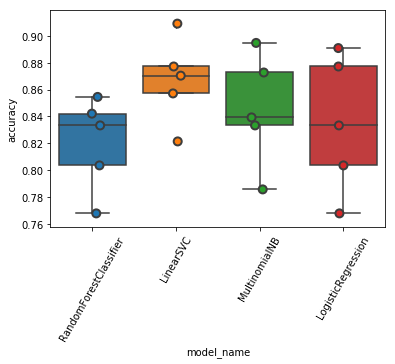

ANALISIS DE SENTIMIENTO


model_name
LinearSVC                 0.867045
LogisticRegression        0.834573
MultinomialNB             0.845159
RandomForestClassifier    0.820283
Name: accuracy, dtype: float64

In [12]:
labels = df_sentiment['sentimiento']
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5

cv_data = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_data = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_data)
sns.stripplot(x='model_name', y='accuracy', data=cv_data, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(fontsize=10, rotation=60)
plt.show()

print('ANALISIS DE SENTIMIENTO')
cv_data.groupby('model_name').accuracy.mean()

## Análisis de label

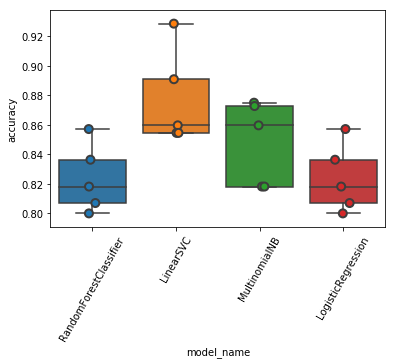

ANALISIS DE LABEL:


model_name
LinearSVC                 0.877644
LogisticRegression        0.823741
MultinomialNB             0.848748
RandomForestClassifier    0.823741
Name: accuracy, dtype: float64

In [13]:
labels = df_label['label']
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5

cv_data = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_data = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_data)
sns.stripplot(x='model_name', y='accuracy', data=cv_data, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(fontsize=10, rotation=60)
plt.show()

print('ANALISIS DE LABEL:')
cv_data.groupby('model_name').accuracy.mean()

## Análisis de categoría

/Users/chango/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/chango/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/chango/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/chango/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only

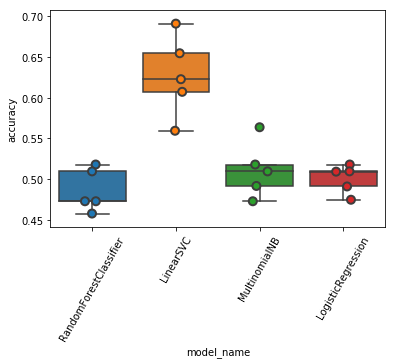

ANALISIS DE CATEGORIA:


model_name
LinearSVC                 0.626912
LogisticRegression        0.500373
MultinomialNB             0.511036
RandomForestClassifier    0.486075
Name: accuracy, dtype: float64

In [14]:
labels = df_category['categoria']
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5

cv_data = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_data = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_data)
sns.stripplot(x='model_name', y='accuracy', data=cv_data, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(fontsize=10, rotation=60)
plt.show()


print('ANALISIS DE CATEGORIA:')
cv_data.groupby('model_name').accuracy.mean()

## Evaluación del modelo

Se analizará el modelo que mejor de según el tags correspondiente.

### Modelos LinearSVC

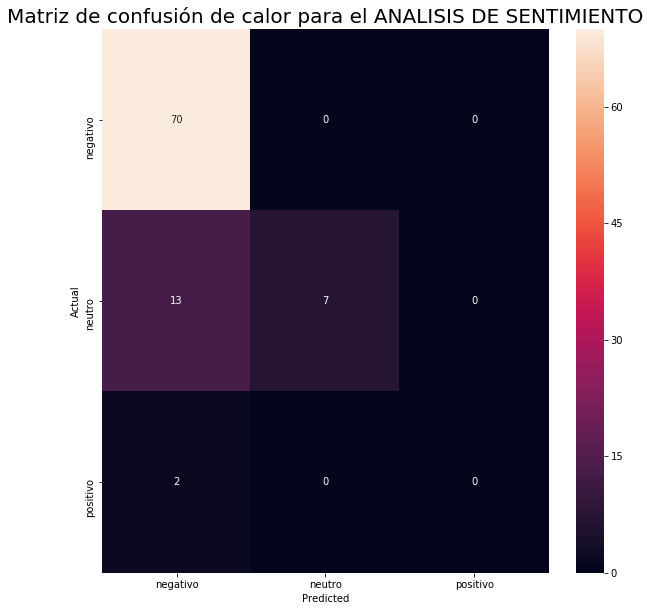

             precision    recall  f1-score   support

   negativo       0.82      1.00      0.90        70
     neutro       1.00      0.35      0.52        20
   positivo       0.00      0.00      0.00         2

avg / total       0.84      0.84      0.80        92



/Users/chango/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
labels = df_sentiment['sentimiento']
sentiment_id_df = df_sentiment[['sentimiento', 'sentiment_id']].drop_duplicates().sort_values('sentiment_id')
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_sentiment.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Matriz de confusión de calor para el ANALISIS DE SENTIMIENTO", fontsize=20)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=sentiment_id_df.sentimiento.values, yticklabels=sentiment_id_df.sentimiento.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test, y_pred, target_names=df_sentiment['sentimiento'].unique()))

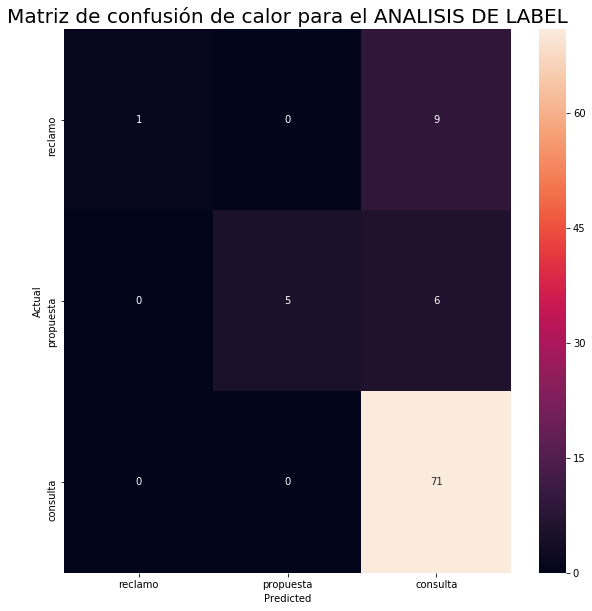

             precision    recall  f1-score   support

    reclamo       1.00      0.10      0.18        10
  propuesta       1.00      0.45      0.62        11
   consulta       0.83      1.00      0.90        71

avg / total       0.87      0.84      0.79        92



In [16]:
labels = df_label['label']
label_id_df = df_label[['label', 'label_id']].drop_duplicates().sort_values('label_id')
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_label.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Matriz de confusión de calor para el ANALISIS DE LABEL", fontsize=20)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=label_id_df.label.values, yticklabels=label_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test, y_pred, target_names=df_label['label'].unique()))

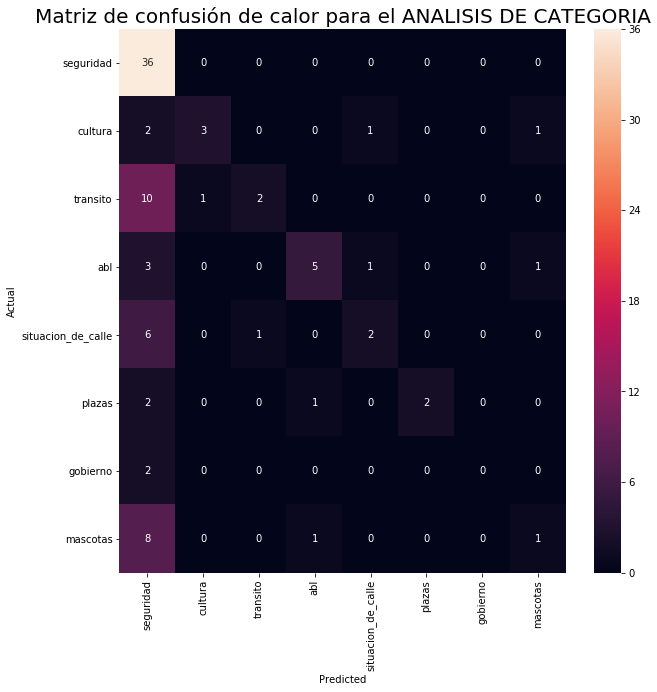

                    precision    recall  f1-score   support

         seguridad       0.52      1.00      0.69        36
           cultura       0.75      0.43      0.55         7
          transito       0.67      0.15      0.25        13
               abl       0.71      0.50      0.59        10
situacion_de_calle       0.50      0.22      0.31         9
            plazas       1.00      0.40      0.57         5
          gobierno       0.00      0.00      0.00         2
          mascotas       0.33      0.10      0.15        10

       avg / total       0.57      0.55      0.49        92



/Users/chango/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
labels = df_category['categoria']
category_id_df = df_category[['categoria', 'category_id']].drop_duplicates().sort_values('category_id')
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_category.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Matriz de confusión de calor para el ANALISIS DE CATEGORIA", fontsize=20)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.categoria.values, yticklabels=category_id_df.categoria.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test, y_pred, target_names=df_category['categoria'].unique()))